# *Case Study on Pre-processing*
Do the following on titanic dataset.

 1) Load the dataset into python environment

 2) Make ‘PassengerId’ as the index column

 3) Check the basic details of the dataset

 4) Fill in all the missing values present in all the columns in the dataset

 5) Check and handle outliers in at least 3 columns in the dataset

 6) Do min max scaling on the feature set (Take ‘Survived’ as target)

In [1]:
import pandas as pd                        # importing necessary modules
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### *1) Load the dataset into python environment*

In [2]:
df=pd.read_csv('titanic_dataset.csv')             # Loading data in desired format using pandas library.
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Findings:
Passenger details of titanic is given in the dataset. It contains 891 rows & 12 columns(PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked).

### *2) Make ‘PassengerId’ as the index column*

In [3]:
df.set_index('PassengerId',inplace=True)        # Making PassengerId as index column
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### *3) Check the basic details of the dataset*

In [4]:
df.columns                             # checking features.

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.shape  

(891, 11)

In [6]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
df.describe(include='all') 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Celotti, Mr. Francesco",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
df.isna().sum()                       # checking for null values in the data.

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
df['Survived'].value_counts()                 # passengers who have survived.

0    549
1    342
Name: Survived, dtype: int64

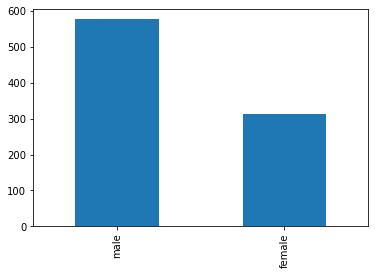

In [10]:
df['Sex'].value_counts().plot(kind='bar');    # gender wise analysis of passengers who have survived.

In [11]:
df.groupby('Survived')['Sex'].value_counts()   

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

In [12]:
df[["Sex", "Age"]].groupby("Sex").mean()        # genderwise average age of passengers.

,Age
Sex,
female,27.915709
male,30.726645


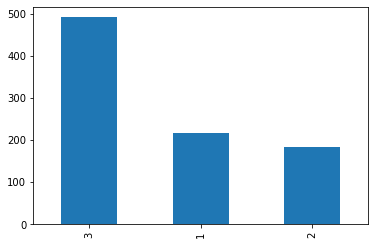

In [13]:
df['Pclass'].value_counts().plot(kind='bar');   #information about passengers based on passenger class.

In [14]:
df.groupby('Sex')['Pclass'].value_counts()

Sex     Pclass
female  3         144
        1          94
        2          76
male    3         347
        1         122
        2         108
Name: Pclass, dtype: int64

#### Findings:
    
1. Dataset contains 891 entries and 11 features ( with float64(2), int64(4), object(5) datatypes)

2. There are some missing values in the columns 'Age',' Embarked' and 'Cabin'. 
For a total of 891 entries;
    • 'Age'     = 714 values

    • 'Cabin'   = 204 values

    • 'Embarked'= 889 values   are only present.

3.The number of null values present in ;
    • 'Age'     = 177

    • 'Cabin'   = 687

    • 'Embarked'= 2

4. By gender wise analysis, most of the passengers are male.

5. Most of the passengers lost their lives(549) in the tragic accident. Out of 342 passengers survived, 233 are females and 109 are males.

6. 216 are first class passengers(94 females and 122 males),184 are second class passengers (76 females and 108 males) 
   and 491 are of third class passengers (144 females and 347 males).

7.  from the statistical informations,

    • Most of the passengers are male(577).
    
    • Mean age of passengers = 29 (std=14.52..). 
    
    • 75% of the passengers are 38 age group, 50% are of 28.
    
    • There are some unique values in some columns; Ticket=681, cabin=147 (for total counts=204), embarked=3 (for total 
      counts=889). some values are missing from these columns.
    

### *4) Fill in all the missing values present in all the columns in the dataset*

In [15]:
df.dtypes                      # checking data types of the variables.

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [16]:
df.isnull().sum()                                 # finding missing values

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

There are missing values in the columns Age, Cabin and Embarked that we should either fill or remove.

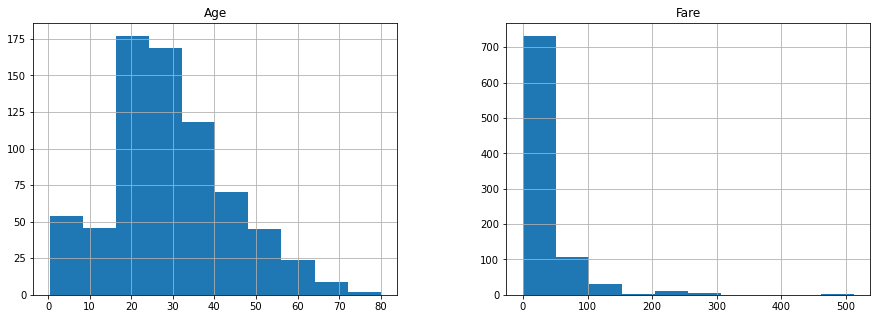

In [17]:
freqgraph = df.select_dtypes(include=['float64'])     #checking skewness of numerical data
freqgraph.hist(figsize=(15,5))
plt.show()

From the histograms of Age and Fare, we can see both are right skewed. So,inorder to fill missing values in numerical data(Age) we can use median. But mean or median cannot be used for categorical data like Cabin and Embarked. we can use mode instead of it.

In [18]:
df['Age']=df['Age'].fillna(df['Age'].median())     # filling missing values in numerical variable 'Age' by median.

In [19]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Now we want to fill the categorical variables 'Embarked' and 'Cabin'.

##### method 1:

In [20]:
df['Embarked'].fillna(df['Embarked'].value_counts().index[0], inplace = True)
df.fillna(value = {'Cabin':'unknown'}, inplace = True)   # replacing missing values in 'cabin' by 'unknown'.

In [21]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

##### method 2: by using mode

In [22]:
df['Embarked'].mode()[0]
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [23]:
df['Cabin'].mode()[0]
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)

In [24]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

#### Findings: 
Now, the missing values in columns 'Embarked', 'Cabin' and 'Age' are filled.

In [25]:
df.shape

(891, 11)

### *5) Check and handle outliers in at least 3 columns in the dataset*

We have to detect and remove outliers since it may cause experimental error or variablity in our result.

#### a) checking outliers for column 'Age'

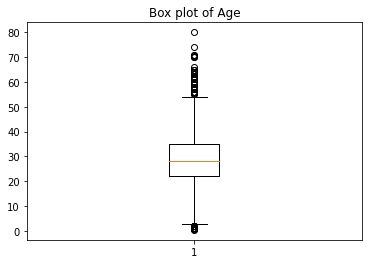

In [26]:
# plotting box plot to check for outliers.
plt.boxplot(df['Age'])
plt.title('Box plot of Age');

There are many outliers in the box plot we need to remove. For that we have to check the variablity in the data using inter quartile range. By this method, we can find lower and upper limit of data.

In [27]:
# finding different quartile values

Q1= np.percentile(df['Age'], 25, interpolation='midpoint')
Q2= np.percentile(df['Age'], 50, interpolation='midpoint')
Q3= np.percentile(df['Age'], 75, interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
35.0


Normally the data points which falls below lower limit (ie, Q1-1.5IQR) and above upper limit (Q3+1.5IQR) are considered outliers.

In [28]:
IQR = Q3-Q1                # assigning variable IQR which denotes inter quartile range.
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

2.5
54.5


We can neglect values below 2.5 and above 54.5 which are the outliers in column 'age'.

In [29]:
outlier=[]
for x in df['Age']:
    if ((x > up_lim) or (x < low_lim)):
        outlier.append(x)

In [30]:
outlier                   # printing outliers

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [31]:
ind1 = df['Age'] > up_lim             # finding index of these outliers.
df.loc[ind1].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [32]:
ind2 = df['Age'] <low_lim
df.loc[ind2].index

Int64Index([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],
           dtype='int64', name='PassengerId')

In [33]:
#dropping outliers above upper limit
df.drop([12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880 ], inplace= True)

In [34]:
# dropping outliers below lower limit
df.drop([ 8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832], inplace= True)

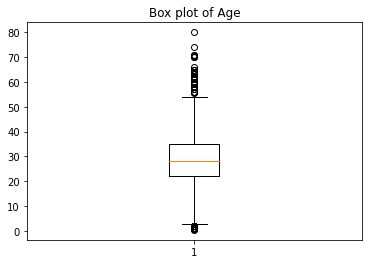

In [35]:
# checking again box plot of 'Age'.
plt.boxplot(df['Age'])
plt.title('Box plot of Age');

Now most of the outliers are removed from 'Age' column.

#### b) Checking outliers for Column 'Fare'.

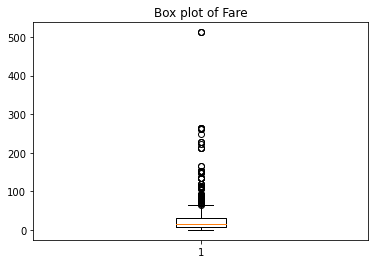

In [36]:
#checking outliers in 'Fare' column using box plot
plt.boxplot(df['Fare'])
plt.title('Box plot of Fare');

Here also there are many outliers we need to remove.

In [37]:
# finding different quartile values
Q1= np.percentile(df['Fare'], 25, interpolation='midpoint')
Q2= np.percentile(df['Fare'], 50, interpolation='midpoint')
Q3= np.percentile(df['Fare'], 75, interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

7.925
14.4542
30.6958


In [38]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

-26.231199999999998
64.852


Now, we need to remove the values below -25.3666.. and above 63.33329...

In [39]:
outlier=[]
for x in df['Fare']:
    if ((x > up_lim) or (x < low_lim)):
        outlier.append(x)

In [40]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 73.5,
 77.2875,
 79.2,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 93.5,
 80.0,
 83.1583,
 69.55,
 89.1042,
 164.8667,
 69.55,
 83.1583]

In [41]:
ind1 = df['Fare'] > up_lim
index_fare=df.loc[ind1].index         # storing indexes in  variable index_fare.

In [42]:
index_fare

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            790, 793, 821, 830, 836, 847, 850, 857, 864, 880],
           dtype='int64', name='PassengerId', length=108)

There are 108 outliers in 'fare' column.

In [43]:
df.drop(index_fare, inplace= True)    # dropping outliers

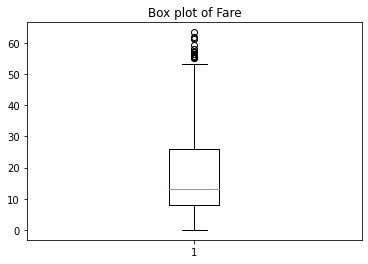

In [44]:
plt.boxplot(df['Fare'])
plt.title('Box plot of Fare');

#### c) checking outliers in 'SibSP'.

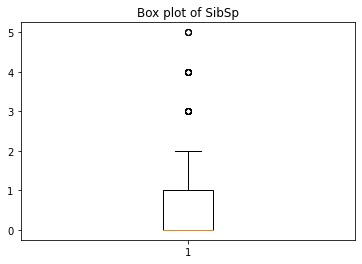

In [45]:
plt.boxplot(df['SibSp'])
plt.title('Box plot of SibSp');

In [46]:
# finding different quartile values
Q1= np.percentile(df['SibSp'], 25, interpolation='midpoint')
Q2= np.percentile(df['SibSp'], 50, interpolation='midpoint')
Q3= np.percentile(df['SibSp'], 75, interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [47]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

-1.5
2.5


In [48]:
outlier=[]
for x in df['SibSp']:
    if ((x > up_lim) or (x < low_lim)):
        outlier.append(x)

In [49]:
outlier

[3,
 4,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 4,
 4,
 3,
 3,
 4,
 4,
 4,
 4,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 4,
 3,
 4,
 3,
 4]

In [50]:
ind1 = df['SibSp'] > up_lim
sibsp_index=df.loc[ind1].index    

In [51]:
sibsp_index

Int64Index([  8,  17,  25,  51,  60,  64,  69,  72,  86, 120, 165, 177, 230,
            234, 262, 267, 279, 375, 387, 410, 481, 486, 542, 543, 635, 643,
            687, 727, 814, 820, 825],
           dtype='int64', name='PassengerId')

In [52]:
df.drop(sibsp_index, inplace= True)    # dropping outliers

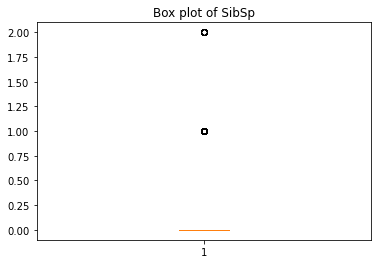

In [53]:
plt.boxplot(df['SibSp'])
plt.title('Box plot of SibSp');

#### d) checking outliers in 'Survived'

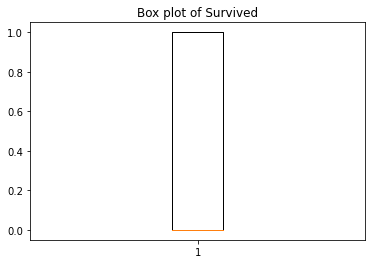

In [54]:
plt.boxplot(df['Survived'])
plt.title('Box plot of Survived');

There are no outliers in column 'Survived'.

#### e) checking outliers in Pclass

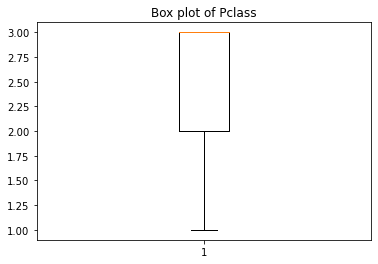

In [55]:
plt.boxplot(df['Pclass'])
plt.title('Box plot of Pclass');

There are no outliers in column 'Pclass'.

#### Findings:
    

The columns 'Age','Fare','SibSp' contain many outliers that we removed.

### *6) Do min max scaling on the feature set (Take ‘Survived’ as target)*

In [56]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Approach 1:
considering only numerical features and dropping categorical ones.

In [57]:
x = df.drop(['Survived','Name','Sex','Ticket','Embarked','Cabin'],axis=1)

In [58]:
x.describe()

,Pclass,Age,SibSp,Parch,Fare
count,686.000000,686.000000,686.000000,686.000000,686.000000
mean,2.444606,29.603134,0.275510,0.288630,17.101421
std,0.746178,12.339618,0.505342,0.761147,13.099259
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,12.281250
75%,3.000000,35.000000,0.000000,0.000000,25.982300
max,3.000000,80.000000,2.000000,6.000000,63.358300


In [59]:
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale

In [60]:
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
x= min_max.fit_transform(x)
x=pd.DataFrame(x)

In [61]:
x.describe()

,0,1,2,3,4
count,686.000000,686.000000,686.000000,686.000000,686.000000
mean,0.722303,0.366714,0.137755,0.048105,0.269916
std,0.373089,0.155059,0.252671,0.126858,0.206749
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.283740,0.000000,0.000000,0.124621
50%,1.000000,0.346569,0.000000,0.000000,0.193838
75%,1.000000,0.434531,0.000000,0.000000,0.410085
max,1.000000,1.000000,1.000000,1.000000,1.000000


#### Approach 2:
By using encoding we can change categorical variable to numerical. Then we can use min max scaling for categorical too.

In [62]:
en_df=df.drop(['Survived','Name'],axis=1)  #assigning a variable en_df for storing variables except survived and name.
en_df

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,3,male,22.0,1,0,A/5 21171,7.2500,unknown,S
3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S
4,1,female,35.0,1,0,113803,53.1000,C123,S
5,3,male,35.0,0,0,373450,8.0500,unknown,S
6,3,male,28.0,0,0,330877,8.4583,unknown,Q
...,...,...,...,...,...,...,...,...,...
887,2,male,27.0,0,0,211536,13.0000,unknown,S
888,1,female,19.0,0,0,112053,30.0000,B42,S
889,3,female,28.0,1,2,W./C. 6607,23.4500,unknown,S


In [63]:
en_df=pd.get_dummies(en_df)
en_df

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Ticket_110465,Ticket_110564,Ticket_111240,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_unknown,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,22.0,1,0,7.2500,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,3,26.0,0,0,7.9250,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,1,35.0,1,0,53.1000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,3,35.0,0,0,8.0500,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
6,3,28.0,0,0,8.4583,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,27.0,0,0,13.0000,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
888,1,19.0,0,0,30.0000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
889,3,28.0,1,2,23.4500,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [64]:
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
en_df = min_max.fit_transform(en_df)
en_df=pd.DataFrame(en_df)

In [65]:
en_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,672,673,674,675,676,677,678,679,680,681
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,...,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,0.722303,0.366714,0.137755,0.048105,0.269916,0.310496,0.689504,0.002915,0.001458,0.001458,...,0.002915,0.004373,0.004373,0.001458,0.002915,0.002915,0.846939,0.161808,0.096210,0.741983
std,0.373089,0.155059,0.252671,0.126858,0.206749,0.463034,0.463034,0.053955,0.038180,0.038180,...,0.053955,0.066033,0.066033,0.038180,0.053955,0.053955,0.360309,0.368543,0.295094,0.437863
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.283740,0.000000,0.000000,0.124621,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.346569,0.000000,0.000000,0.193838,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.434531,0.000000,0.000000,0.410085,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Sruthy B (DSA-B3)